In [1]:
import torch
from torchvision import datasets, transforms  # datasets: 많은 데이터가 들어가 있음, transforms: 이미지를 변환시켜줌
import matplotlib.pyplot as plt

## 구글 드라이브와 연동

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# GPU 확인
# torch.cuda.is_available()

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cuda


### train_DS, test_DS 구경해보기

In [4]:
transform = transforms.ToTensor()
train_DS = datasets.MNIST(root = '/content/drive/MyDrive/Colab Notebooks/data', train=True, download=True, transform=transform)
test_DS = datasets.MNIST(root = '/content/drive/MyDrive/Colab Notebooks/data', train=False, download=True, transform=transform)

In [5]:
print(train_DS)
print(test_DS)
print()
print(len(train_DS))  # 갯수만 확인
print(len(test_DS))   # 갯수만 확인

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Test
    StandardTransform
Transform: ToTensor()

60000
10000


In [6]:
train_DS.classes  # 10가지의 클래스가 있음 (각각에 대해 인덱스가 있다? -> 라벨링이 되어 있다.)

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [7]:
train_DS.class_to_idx  # 클래스를 인덱스로 확인

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [8]:
train_DS.data.shape

torch.Size([60000, 28, 28])

In [9]:
train_DS.data[0]  # 밝은 부분이 255에 가까움

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

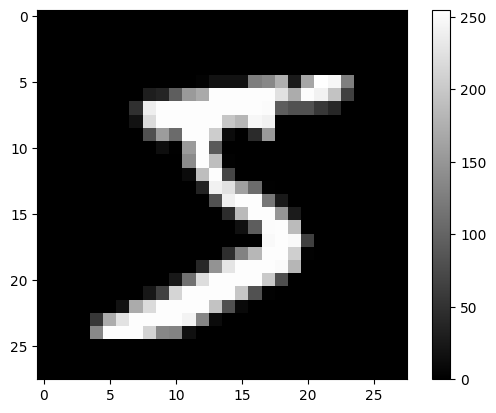

In [10]:
plt.imshow(train_DS.data[0], cmap='gray')
plt.colorbar()  # 이미지 오른쪽에 숫자 그래프를 표시

In [11]:
print(train_DS.targets)  # 정답 확인
print(train_DS.targets.shape)  # 정답 확인

# 위를 예시로 들자면 data[0]의 정답은 targets[0]이다.
print(train_DS.targets[0])

tensor([5, 0, 4,  ..., 5, 6, 8])
torch.Size([60000])
tensor(5)


## DataLoader 구경

In [12]:
BATCH_SIZE = 32
train_DL = torch.utils.data.DataLoader(train_DS, batch_size=BATCH_SIZE, shuffle=True)  # shuffle: 데이터 썪을 꺼야?
test_DL = torch.utils.data.DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)  # shuffle: 데이터 썪을 꺼야?

In [13]:
print(len(train_DL.dataset))

60000


<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 1, 28, 28])
torch.Size([32])
tensor(7)
torch.uint8
torch.float32


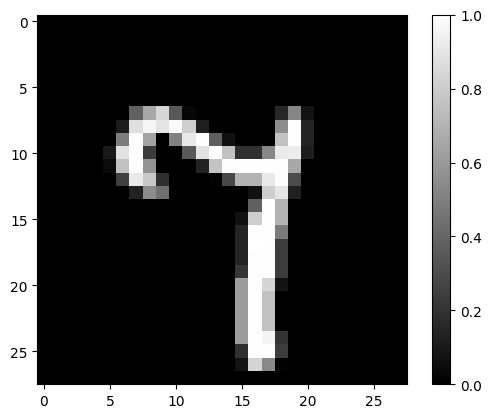

In [14]:
x_batch, y_batch = next(iter(train_DL))  # iter로 데이터를 묶은 뒤 next로 한 국자? 꺼낸다
print(type(train_DS.data))
print(type(x_batch))
print(x_batch.shape)  # 28x28이 한 채널 있고, 32개가 있다 -> 흑백
print(y_batch.shape)  # 32장에 대한 정답
plt.imshow(x_batch[0].squeeze(), cmap="gray")  # 그냥 x_batch[0]을 하면 shape이 torch.Size([32, 1, 28, 28])이기 때문에 차원이 1인 것을 줄이고 imshow
plt.colorbar()
print(y_batch[0])

print(train_DL.dataset.data.dtype)
print(x_batch.dtype)

# ToTensor()의 역할
# 1. tensor로 바꿔준다.
# 2. 개채행렬로 바꿔준다.
# 3. 0~1 사이로 바꿔준다. (int -> float)

# 본격적으로 model 만들기

In [15]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear = nn.Sequential(nn.Linear(28*28, 100),  # fc이기 때문에 행*렬 즉, 이미지의 전체 크기를 input으로 넣고, 출력은 100으로
                                    nn.ReLU(),
                                    nn.Linear(100, 10))  # 정답이 10개이기 때문에 10개로 output이 되어야한다.

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.linear(x)
        return x

In [16]:
# flatten 확인
x_batch, _ = next(iter(train_DL))
print(x_batch.shape)
flat_images = torch.flatten(x_batch)
print(flat_images.shape)

flat2_images = torch.flatten(x_batch, start_dim=1)  # dim=1 부터 차원을 flatten 하라
print(flat2_images.shape)  # 따라서 32는 유지하되 1,28 ,28 이 flatten되면서 28*28이 됨

torch.Size([32, 1, 28, 28])
torch.Size([25088])
torch.Size([32, 784])


In [17]:
model = MLP()
print(model)

x_batch, _ = next(iter(train_DL))
print(model(x_batch).shape)

MLP(
  (linear): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)
torch.Size([32, 10])


## 모델 훈련 시키기

In [18]:
from torch import optim
import torch.nn.functional as F

LR = 1e-3
EPOCH = 10
criterion = nn.CrossEntropyLoss()  # F를 사용하지 않고 loss를 정의 (많은 사람들이 이렇게 사용)
optimizer = optim.Adam(model.parameters(), lr=LR)

loss_history =[]
NoT = len(train_DL.dataset)

model.train()
for ep in range(EPOCH):
    rloss = 0 # 아래에서 일어나는 loss가 최저일 때만 리스트에 담지 않도록 평균값을 계산하기 위함
    for x_batch, y_batch in train_DL:
        # inference
        y_hat = model(x_batch)
        # loss
        loss = criterion(y_hat, y_batch)  # 이 부분에서 위에서 정의한 loss(criterion)이 사용됨
        # update
        optimizer.zero_grad() # gradient 누적을 막기 위한 초기화
        loss.backward() # backpropagation
        optimizer.step() # weight update
        #loss accumulation
        loss_b = loss.item() * x_batch.shape[0]  # BATCH_SIZE를 왜 곱하지 않냐면 전체 데이터가 50개라면 18개가 남아버려 계산이 이상해지기 때문
        rloss += loss_b  # running loss
        # print loss
    loss_e = rloss/NoT
    loss_history += [loss_e]
    print(f"Epoch: {ep+1}, train loss: {round(loss_e,3)}")
    print("-"*20)

Epoch: 1, train loss: 0.305
--------------------
Epoch: 2, train loss: 0.136
--------------------
Epoch: 3, train loss: 0.096
--------------------
Epoch: 4, train loss: 0.073
--------------------
Epoch: 5, train loss: 0.057
--------------------
Epoch: 6, train loss: 0.047
--------------------
Epoch: 7, train loss: 0.038
--------------------
Epoch: 8, train loss: 0.033
--------------------
Epoch: 9, train loss: 0.026
--------------------
Epoch: 10, train loss: 0.023
--------------------


In [19]:
# 위 코드를 자주 사용하기 때문에 함수로 만듬
from torch import optim

LR = 1e-3
EPOCH = 5
criterion = nn.CrossEntropyLoss()  # F를 사용하지 않고 loss를 정의 (많은 사람들이 이렇게 사용)

def Train(model, train_DL, criterion, optimizer):
    loss_history =[]
    NoT = len(train_DL.dataset)

    model.train()
    for ep in range(EPOCH):
        rloss = 0 # 아래에서 일어나는 loss가 최저일 때만 리스트에 담지 않도록 평균값을 계산하기 위함
        for x_batch, y_batch in train_DL:
            x_batch = x_batch.to(DEVICE)  # 이거 안하면 GPU 설정 되있어도 안씀;;
            y_batch = y_batch.to(DEVICE)  # 이거 안하면 GPU 설정 되있어도 안씀;;
            # inference
            y_hat = model(x_batch)
            # loss
            loss = criterion(y_hat, y_batch)  # 이 부분에서 위에서 정의한 loss(criterion)이 사용됨
            # update
            optimizer.zero_grad() # gradient 누적을 막기 위한 초기화
            loss.backward() # backpropagation
            optimizer.step() # weight update
            #loss accumulation
            loss_b = loss.item() * x_batch.shape[0]  # BATCH_SIZE를 왜 곱하지 않냐면 전체 데이터가 50개라면 18개가 남아버려 계산이 이상해지기 때문
            rloss += loss_b  # running loss
            # print loss
        loss_e = rloss/NoT
        loss_history += [loss_e]
        print(f"Epoch: {ep+1}, train loss: {round(loss_e,3)}")
        print("-"*20)

    return loss_history

## Cross Entropy 확인(왜 모델에 softmax를 안붙였을까?)

In [20]:
import torch.nn.functional as F

y_hat = torch.randn(3, 5)  # 데이터는 세 개, 5 종류로 분류하는 문제 가정
print(y_hat)  # 기로 축으로 합이 1이 아님, 즉, softmax 통과 전
y_batch = torch.randint(5, (3,))
print(y_batch)  # softmax를 흉내내보기


# 방법 1
loss = F.cross_entropy(y_hat, y_batch)
print(loss)

# 방법 2
criterion = nn.CrossEntropyLoss()
print(criterion(y_hat, y_batch))

# 방법 3
y_hat_soft = F.softmax(y_hat, dim=1)
print(y_hat_soft)

loss = 0
for i, val in enumerate(y_hat_soft):
    print(i, val)
    loss += -torch.log(val[y_batch[i]])  # 직접 구현하기

print(loss / 3)  # 실제 문서를 찾아보면 F.softmax에 평균이 내장되어 있음을 알 수 있다.

tensor([[ 1.0790,  0.5780,  0.3746, -1.7941, -0.4701],
        [-0.3110,  0.9593, -0.4997, -0.3558,  0.9283],
        [-0.0720, -2.3068, -0.9546,  0.5904, -0.9204]])
tensor([4, 3, 0])
tensor(2.0323)
tensor(2.0323)
tensor([[0.4221, 0.2557, 0.2087, 0.0239, 0.0897],
        [0.1021, 0.3635, 0.0845, 0.0976, 0.3524],
        [0.2572, 0.0275, 0.1064, 0.4988, 0.1101]])
0 tensor([0.4221, 0.2557, 0.2087, 0.0239, 0.0897])
1 tensor([0.1021, 0.3635, 0.0845, 0.0976, 0.3524])
2 tensor([0.2572, 0.0275, 0.1064, 0.4988, 0.1101])
tensor(2.0323)


## 모델 학습시키기

Epoch: 1, train loss: 0.305
--------------------
Epoch: 2, train loss: 0.139
--------------------
Epoch: 3, train loss: 0.096
--------------------
Epoch: 4, train loss: 0.075
--------------------
Epoch: 5, train loss: 0.057
--------------------


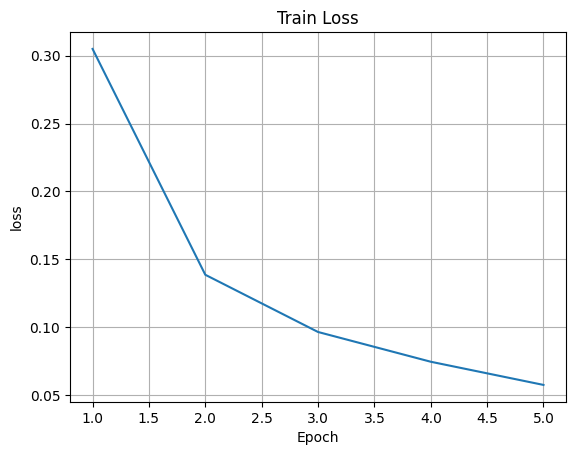

In [21]:
model = MLP().to(DEVICE) # x_batch, y_batch, model 까지 DEVICE에 올려줘야 함
optimizer = optim.Adam(model.parameters(), lr=LR)
loss_history = Train(model, train_DL, criterion, optimizer)

plt.plot(range(1,EPOCH+1),loss_history)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title("Train Loss")
plt.grid()

## 모델 저장하기 & 불러오기

In [22]:
save_model_path = '/content/drive/MyDrive/Colab Notebooks/result/MLP_MNIST.pt'
torch.save(model.state_dict(), save_model_path)
model.state_dict()

OrderedDict([('linear.0.weight',
              tensor([[ 3.4172e-02, -2.9719e-03, -2.5781e-02,  ..., -1.6026e-02,
                       -3.1223e-02,  9.5601e-03],
                      [ 5.8366e-05, -2.8780e-02, -8.8483e-03,  ..., -2.9348e-02,
                       -2.1641e-02, -3.0230e-02],
                      [ 2.3365e-02,  2.1481e-03, -2.0708e-02,  ...,  1.6008e-02,
                       -2.5820e-02, -9.3625e-03],
                      ...,
                      [ 1.9883e-02,  8.1137e-03, -4.6857e-03,  ...,  7.2069e-03,
                       -2.4739e-02, -1.3361e-03],
                      [ 2.8175e-02, -1.0388e-02,  1.6539e-02,  ..., -3.2460e-02,
                       -1.6322e-02, -3.3049e-02],
                      [-2.6026e-02,  2.8210e-03, -2.5548e-02,  ..., -2.3364e-02,
                       -2.1233e-02,  1.6625e-02]], device='cuda:0')),
             ('linear.0.bias',
              tensor([-0.0456,  0.2349, -0.0794,  0.0316, -0.0345,  0.0654, -0.0656,  0.0577,
         

In [25]:
load_model = MLP().to(DEVICE)
load_model.load_state_dict(torch.load(save_model_path, map_location=DEVICE))  # GPU에서 학습한 모델을 CPU에서 돌리면 에러가 발생 -> map_location 추가

<All keys matched successfully>

## 모델 테스트

In [37]:
model.eval()
with torch.no_grad():
    rcorrect = 0
    for x_batch, y_batch in test_DL:
        x_batch = x_batch.to(DEVICE)
        y_batch = y_batch.to(DEVICE)
        # inference
        y_hat = model(x_batch)
        # accuracy accumulation
        # print(y_hat.shape)
        pred = y_hat.argmax(dim=1)  # dim=1인 이유는 10개 중에서 비교를 해야하기 때문에 dim=1이 된다.
        corrects_b = torch.sum(pred == y_batch).item()
        rcorrect += corrects_b
        # print(pred)
        # print(y_batch)
        # break  # 혹시나 모르겠다면 break를 추가하여 한 번 돌고 바로 정지해서 값 확인하기
    accuracy_e = rcorrect/len(test_DL.dataset)*100
print(f"Test accuracy: {rcorrect}/{len(test_DL.dataset)} ({round(accuracy_e,1)} %)")

Test accuracy: 9757/10000 (97.6 %)


In [38]:
# 함수로 만들어주기
def Test(model, test_DL):
    model.eval()
    with torch.no_grad():
        rcorrect = 0
        for x_batch, y_batch in test_DL:
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)
            # inference
            y_hat = model(x_batch)
            # accuracy accumulation
            # print(y_hat.shape)
            pred = y_hat.argmax(dim=1)  # dim=1인 이유는 10개 중에서 비교를 해야하기 때문에 dim=1이 된다.
            corrects_b = torch.sum(pred == y_batch).item()
            rcorrect += corrects_b
            # print(pred)
            # print(y_batch)
            # break  # 혹시나 모르겠다면 break를 추가하여 한 번 돌고 바로 정지해서 값 확인하기
        accuracy_e = rcorrect/len(test_DL.dataset)*100
    print(f"Test accuracy: {rcorrect}/{len(test_DL.dataset)} ({round(accuracy_e,1)} %)")

In [39]:
Test(load_model, test_DL)

Test accuracy: 9757/10000 (97.6 %)


In [40]:
def Test_plot(model, test_DL):
    model.eval()
    with torch.no_grad():
        x_batch, y_batch = next(iter(test_DL))
        x_batch = x_batch.to(DEVICE)
        y_hat = model(x_batch)
        pred = y_hat.argmax(dim=1)

    x_batch = x_batch.to("cpu")

    plt.figure(figsize=(8,4))
    for idx in range(6):
        plt.subplot(2,3, idx+1, xticks=[], yticks=[])
        plt.imshow(x_batch[idx].permute(1,2,0).squeeze(), cmap="gray")
        pred_class = test_DL.dataset.classes[pred[idx]]
        true_class = test_DL.dataset.classes[y_batch[idx]]
        plt.title(f"{pred_class} ({true_class})", color = "g" if pred_class==true_class else "r")

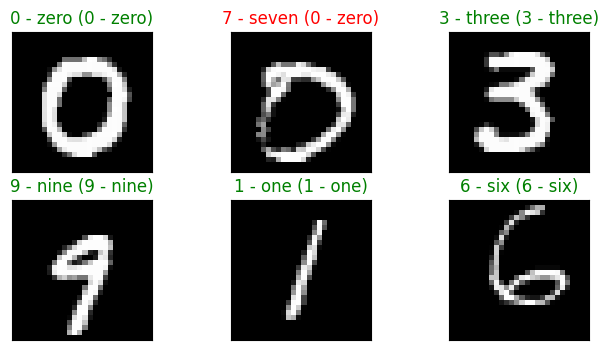

In [47]:
Test_plot(load_model, test_DL)

In [48]:
# 파라미터 수 구하기
def count_params(model):
    num = sum([p.numel() for p in model.parameters() if p.requires_grad])
    return num

In [49]:
num = count_params(model)
print(num)

79510
